In [41]:
# Uncomment the line below to install datamol and rdkit
# As usual, installations only need to be done once
#!conda install datamol -c conda-forge 

In [2]:
import datamol as dm
import pandas as pd
from rdkit import Chem

def get_mol(conformers):
    return conformers.GetConformer(0).GetOwningMol()

def conformer_energies(conformers):
    all_props = [conf.GetPropsAsDict() for conf in conformers.GetConformers()]
    return pd.DataFrame(all_props)

def write_conformers(filename, conformers):
    """Writes all conformers to an sdf file with name filename."""
    c0 = conformers.GetConformer(0)
    m0 = c0.GetOwningMol()
    all_props = [conf.GetPropsAsDict() for conf in conformers.GetConformers()]
    energy_keys = [x for x in all_props[0].keys() if 'delta' not in x]
    energy_key = energy_keys[0]
    with Chem.SDWriter(filename+".sdf") as w:
        for i in range(m0.GetNumConformers()):
            m0.SetProp('ID', f'conf_{i}')
            m0.SetProp('E_kcal', f"{all_props[i][energy_key]:.3f}")
            w.write(m0, confId=i)
    
    print(f"Wrote {m0.GetNumConformers()} conformers to {filename}.sdf")
    return m0


In [ ]:
dm.

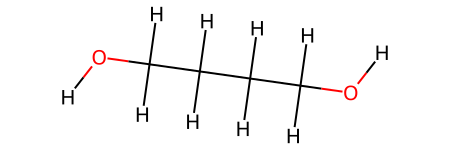

In [34]:
mol = dm.to_mol('OCCCCO', add_hs=True)
mol

In [35]:
mol_conformers = dm.conformers.generate(mol, n_confs=200, forcefield="MMFF94s",
                                        minimize_energy=True,
                                        align_conformers=True,
                                        add_hs=False,
                                        energy_iterations=500
                                       ) 

Wrote 200 conformers to HOOCCCOH.sdf


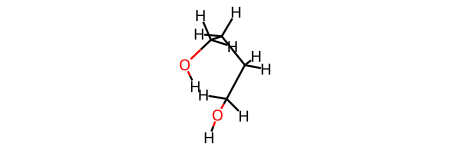

In [36]:
write_conformers('HOOCCCOH', mol_conformers)

The `sdf` file can be read by Avogadro, so that you could run computations starting from any of these conformer files.

In [37]:
df = conformer_energies(mol_conformers)
df[::5] # Just print every 5th row

,rdkit_MMFF94s_energy,rdkit_MMFF94s_delta_energy
0,-2.946938,0.000000e+00
5,-2.946938,3.450136e-09
10,-2.428001,5.189370e-01
15,-2.428001,5.189370e-01
20,-2.103986,8.429527e-01
25,-0.960392,1.986546e+00
30,-0.958259,1.988679e+00
35,-0.933523,2.013415e+00
40,-0.699500,2.247438e+00
45,-0.627436,2.319502e+00


In [38]:
dm.viz.conformers(mol_conformers, remove_hs=False, conf_id=0)

NGLWidget()

In [39]:
dm.viz.conformers(mol_conformers, remove_hs=False, conf_id=199)

NGLWidget()

We can see that the anti arranagement of the Br (conf_id=0) has a higher energy (by about 0.75 kcal/mol), according to the molecular mechanics theory MMFF94s (a Merck model).

# Problems

1. Compute conformers for the molecule 1,4-butanediol (OCCCCO in smiles notation).

2. What is the energy difference between the lowest and highest energy conformers? **Show pictures of each.**

3. Do any conformers seem capable of internal hydrogen bonding?

4. Compare the energy difference to the same 200 conformers for n-hexanes (CCCCCC).

**Takeaway:** Molecular mechanics allows a wide variety of conformers to be quickly generated and optimized - the structures could then be winnowed down to the most important / relevant and computed at a higher level of theory.